# Using Obspy plot the noise floor

To use obspy generate teh noise floor test is relatively easy, only 3 steps:

(1) Get the waveform from NCEDC

(2) Get the pole and zero information for this station

(3) Get the noise floor

The method used here is:

McNamara, D. E. and Buland, R. P. (2004),
Ambient Noise Levels in the Continental United States,
Bulletin of the Seismological Society of America, 94 (4), 1517-1527

### Let's first import useful packages, and also the parse_ncedc.py and build_url.py in the current folder

In [1]:
%matplotlib inline
from obspy.clients.fdsn import Client
import obspy.io.sac.sacpz as spz
import obspy.clients.fdsn.client as cl
from obspy import UTCDateTime, read_inventory
import parse_ncedc as pn
from obspy.signal import PPSD

### (1) Get the waveform

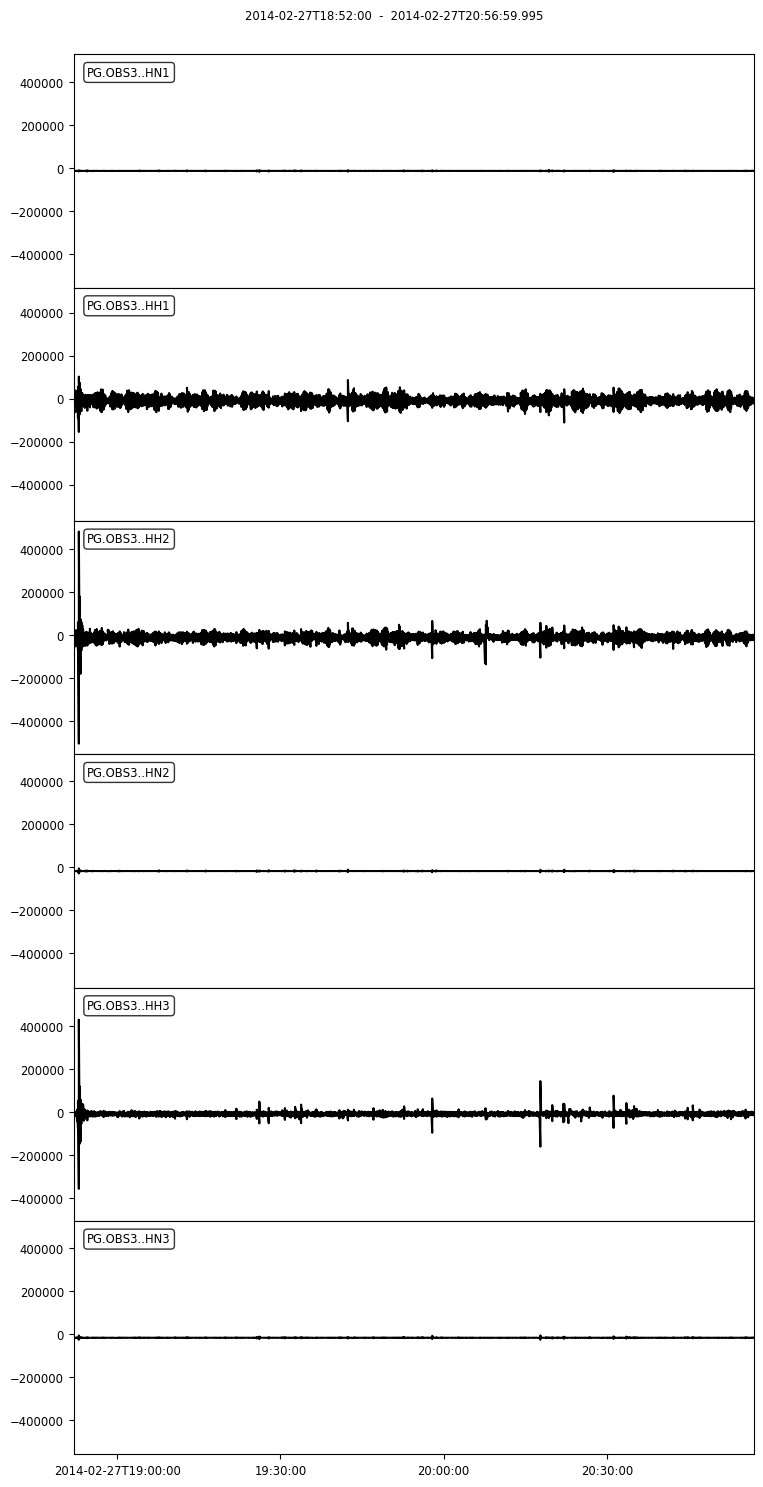

In [2]:
#create an Client object
client = Client('NCEDC')

#specify the start and end time and other station info
t1 = UTCDateTime("2014-02-27T18:52:00.000")
t2 = UTCDateTime("2014-02-27T20:57:00.000")
network = 'PG'
station = 'OBS3'
location = '*'
channel = '*'

#get the waveform as a stream object
st = client.get_waveforms(network, station, location, channel, t1,t2, attach_response=True)

#plot the waveform
st.plot()

#get the first trace of the waveform from the stream
tr = st[0]

### (2) Get the pole and zero information of the station

In [ ]:
cl.build_url(network, "station", 1, "query", {"net": network, "sta": station, "cha": "HH1", "loc": location})

In [ ]:
#get the dataless seed file from NCEDC, I also printed out the url you need to find this file
seed = bu.get_dataless_seed(network, station, location, channel, t1,t2)

In [ ]:
# This has possibly changed - see http://service.ncedc.org/ncedcws/sacpz/help/index.html
spz.attach_paz(tr, 'paz.paz')
paz = tr.stats.paz
tr.stats

### (3) Calculate the noise floor

In [3]:
inv = read_inventory("http://service.ncedc.org/fdsnws/station/1/query?net=PG&sta=OBS3&cha=*&loc=*&start=2014-02-27T18:52:00.000&end=2014-02-27T20:57:00.000&level=response&format=xml&includeavailability=false")

In [4]:
print(inv)

Inventory created at 2019-08-31T04:43:12.000000Z
	Created by: NCEDC WEB SERVICE: fdsnws-station | version: 1.1
		    http://service.ncedc.org/fdsnws/station/1/query?net=PG&sta=OBS3&cha...
	Sending institution: NCEDC (NCEDC)
	Contains:
		Networks (1):
			PG
		Stations (1):
			PG.OBS3 (Diablo Canyon OBS #3)
		Channels (6):
			PG.OBS3..HH1, PG.OBS3..HH2, PG.OBS3..HH3, PG.OBS3..HN1, 
			PG.OBS3..HN2, PG.OBS3..HN3


In [5]:
#Initialize a new PPSD instance. The ppsd object will then make sure that only appropriate 
#data go into the probabilistic psd statistics. Then get the noise floor
ppsd = PPSD(tr.stats, metadata=inv)

In [6]:
ppsd.times_data

[]

In [ ]:
ppsd.hist_stack[56]

In [ ]:
#the following commend will give you all the data used to plot the noise floor
ppsd.hist_stack

#it has 112 array corresponding to 112 center frequency, in each of the array, it has 150 elements corresponding to the amplitude bin
len(ppsd.hist_stack[0])


### A couple of useful things

In [ ]:
ppsd

In [ ]:
from obspy.xseed import Parser

In [ ]:
ppsd??

In [ ]:
%load ./parse_ncedc.py

In [ ]:
%%bash?

In [ ]:
%lsmagic

In [ ]:
!ls

In [ ]:
!pwd

## Very nice gallery of useful ipython notebooks

https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks

In [ ]:
%pwd